<a href="https://colab.research.google.com/github/SauleAbenova/exam/blob/main/Home%20work22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1. Установка Google Chrome (не chromium!)
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt-get -f install -y


--2025-04-25 05:20:53--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 209.85.200.91, 209.85.200.136, 209.85.200.93, ...
Connecting to dl.google.com (dl.google.com)|209.85.200.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115150800 (110M) [application/x-debian-package]
Saving to: ‘google-chrome-stable_current_amd64.deb.1’

google-chrome-stabl 100%[===================>] 109.82M   327MB/s    in 0.3s    

2025-04-25 05:20:54 (327 MB/s) - ‘google-chrome-stable_current_amd64.deb.1’ saved [115150800/115150800]

(Reading database ... 126945 files and directories currently installed.)
Preparing to unpack google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (135.0.7049.114-1) over (135.0.7049.114-1) ...
Setting up google-chrome-stable (135.0.7049.114-1) ...
Processing triggers for mailcap (3.70+nmu1ubuntu1) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package l

In [2]:
!apt install unzip -y
!wget -O /tmp/chromedriver.zip https://chromedriver.storage.googleapis.com/114.0.5735.90/chromedriver_linux64.zip
!unzip /tmp/chromedriver.zip chromedriver -d /usr/bin/
!chmod +x /usr/bin/chromedriver


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.
--2025-04-25 05:21:13--  https://chromedriver.storage.googleapis.com/114.0.5735.90/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 142.251.183.207, 64.233.179.207, 74.125.126.207, ...
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|142.251.183.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7407250 (7.1M) [application/zip]
Saving to: ‘/tmp/chromedriver.zip’

/tmp/chromedriver.z 100%[===================>]   7.06M  --.-KB/s    in 0.03s   

2025-04-25 05:21:13 (206 MB/s) - ‘/tmp/chromedriver.zip’ saved [7407250/7407250]

Archive:  /tmp/chromedriver.zip
replace /usr/bin/chromedriver? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
!google-chrome --version



Google Chrome 135.0.7049.114 


In [9]:
!wget -O /tmp/chromedriver.zip https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/135.0.7049.114/linux64/chromedriver-linux64.zip
!unzip /tmp/chromedriver.zip chromedriver-linux64/chromedriver -d /usr/bin/
!mv /usr/bin/chromedriver-linux64/chromedriver /usr/bin/chromedriver
!chmod +x /usr/bin/chromedriver


--2025-04-25 05:26:51--  https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/135.0.7049.114/linux64/chromedriver-linux64.zip
Resolving edgedl.me.gvt1.com (edgedl.me.gvt1.com)... 34.104.35.123, 2600:1900:4110:86f::
Connecting to edgedl.me.gvt1.com (edgedl.me.gvt1.com)|34.104.35.123|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://storage.googleapis.com/chrome-for-testing-public/135.0.7049.114/linux64/chromedriver-linux64.zip [following]
--2025-04-25 05:26:51--  https://storage.googleapis.com/chrome-for-testing-public/135.0.7049.114/linux64/chromedriver-linux64.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.179.207, 74.125.126.207, 142.251.184.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.179.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9581894 (9.1M) [application/zip]
Saving to: ‘/tmp/chromedriver.zip’

/tmp/chromedriver.z 100%[===================>]   9

In [10]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument("--headless")
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.binary_location = "/usr/bin/google-chrome"

driver = webdriver.Chrome(service=Service("/usr/bin/chromedriver"), options=options)
driver.get("https://www.google.com")
print(driver.title)  # Должно вывести "Google"


Google


In [18]:
!pip install requests beautifulsoup4 pandas matplotlib seaborn


In [21]:
import requests
import pandas as pd
import re

query = "노트북"
headers = {
    "User-Agent": "Mozilla/5.0"
}

# ⚠️ Здесь мы хитро подставляем offset (0, 20, 40...) — постранично
url = f"https://api.bunjang.co.kr/api/1/find_v2.json?q={query}&order=score&n=20&page=1"

response = requests.get(url, headers=headers)
data = response.json()

items = data["list"]

titles, prices, links = [], [], []

for item in items:
    titles.append(item["name"])
    prices.append(item["price"])
    links.append("https://m.bunjang.co.kr/products/" + item["pid"])

# DataFrame
df = pd.DataFrame({
    "제목": titles,
    "가격": prices,
    "링크": links
})

df.head()


,제목,가격,링크
0,게이밍 노트북 고가에 상시 매입합니다!,54250000,https://m.bunjang.co.kr/products/306540179
1,삼성 아티브탭3 사무용 인강용 미니 노트북,85000,https://m.bunjang.co.kr/products/325601029
2,[매입]그램 갤럭시북 맥북 PC 게이밍노트북 24시간 출장방문매입,2500000,https://m.bunjang.co.kr/products/330121147
3,A급 고급형 LG 울트라PC 게이밍 i7/16GB/756GB 노트북,499000,https://m.bunjang.co.kr/products/330121040
4,게이밍 게임 노트북 팝니다,330000,https://m.bunjang.co.kr/products/315371801


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

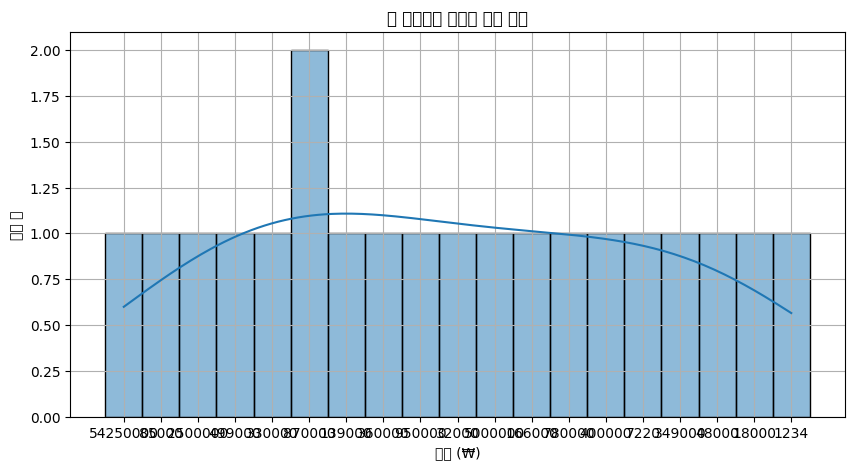

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df["가격"], bins=15, kde=True)
plt.title("💻 번개장터 노트북 가격 분포")
plt.xlabel("가격 (₩)")
plt.ylabel("상품 수")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

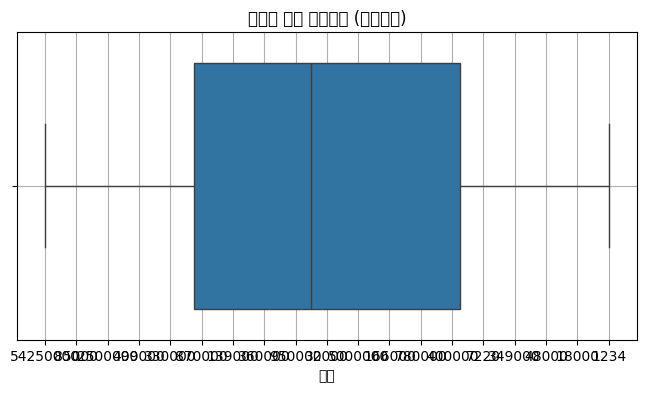

In [23]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["가격"])
plt.title("노트북 가격 박스플롯 (번개장터)")
plt.grid(True)
plt.show()


In [27]:
df["가격"] = pd.to_numeric(df["가격"], errors="coerce")


In [28]:
print("📌 평균 가격:", round(df["가격"].mean()), "₩")


📌 평균 가격: 3382723 ₩


In [29]:
df[df["가격"] < 300000]


,제목,가격,링크
1,삼성 아티브탭3 사무용 인강용 미니 노트북,85000,https://m.bunjang.co.kr/products/325601029
6,갓성비 삼성 슬림하고 가벼운 A급 노트북,139000,https://m.bunjang.co.kr/products/329708472
9,"(새상품) 노트북 파우치, 패드 파우치 일괄",32000,https://m.bunjang.co.kr/products/330120524
11,i7 고성능 15.6인치 삼성 노트북 ssd128 ram8,166000,https://m.bunjang.co.kr/products/329487318
15,삼성노트북 아답터 19v 3.16A,7220,https://m.bunjang.co.kr/products/325530725
17,샘소나이트 노트북 백팩,48000,https://m.bunjang.co.kr/products/326023294
18,노트북 파우치 15인치 (7321디자인),18000,https://m.bunjang.co.kr/products/180436060
19,로스모어 노트북 파우치 구해요,1234,https://m.bunjang.co.kr/products/320384243


In [30]:
df.to_csv("bunjang_laptops.csv", index=False)


In [31]:
from google.colab import files
files.download("bunjang_laptops.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>